Carolyn Massa

AIRBNB Pricing Forecast- Paris, France - Notebook 3 of 5


This noteboook reviews the prices and availability for the 58,184 listings as when a host begins they can set up their calendar to determine how many days out of the year they want to rent their space.

Take note that in Paris spaces where the owner does NOT claim as his/her prime residence can ONLY be rented 120 days out of the 365 days of the year.

More information is here: http://insideairbnb.com/paris/

In my DataFrame for Calendar I have the following values:
    
    Listing ID: Each listing has their own ID
    
    Date: The date of the time frame by Day
    
    Available: Categorical Value This will read T if the property is available for rent and F if it is not available    
    Price: The Price of the each listing for a one night rental
    
    Adjusted Price: Sometimes the renter will adjust their price to meet market demands
    
    Minimum Nights: The least number of nights the Owner is willing to rent it to a guest
    
    Maximum Nights:The maximum nights the Owner is willing to rent it though Paris has restrictions to 120 days per year if the property is the Owner's primary resident so we can "guess" that is the listing is on the market for more than 120 days it is classified as a share or it is simply "illegal".    
    
    In this data set there are: 7 columns and 21,236,885 observations which is comprised of 58,184 multiplied by 365 nights

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot

import seaborn as sns
import re
import datetime
import calendar
import datetime
#!pip freeze > requirements.!pip freeze > requirements.txt 
#$ pip install -r requirements.txt
%matplotlib inline
from matplotlib import pyplot as plt


In [2]:
Calendar_2019_04 = pd.read_csv('calendar_2019_04.csv', low_memory=False)

In [3]:
Calendar_2019_04.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21236885 entries, 0 to 21236884
Data columns (total 7 columns):
 #   Column          Dtype  
---  ------          -----  
 0   listing_id      int64  
 1   date            object 
 2   available       object 
 3   price           object 
 4   adjusted_price  object 
 5   minimum_nights  float64
 6   maximum_nights  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 1.1+ GB


In [4]:
Calendar_2019_04.iloc[:,1]

0           2019-04-10
1           2019-04-11
2           2019-04-12
3           2019-04-13
4           2019-04-14
               ...    
21236880    2020-04-04
21236881    2020-04-05
21236882    2020-04-06
21236883    2020-04-07
21236884    2020-04-08
Name: date, Length: 21236885, dtype: object

In [5]:
Calendar_2019_04.iloc[:,4:6].columns

Index(['adjusted_price', 'minimum_nights'], dtype='object')

In [6]:
Calendar_2019_04.tail(5) #Note that f(false) means not available, t(true) means available

,listing_id,date,available,price,adjusted_price,minimum_nights,maximum_nights
21236880,33338090,2020-04-04,f,$65.00,$65.00,1.0,1125.0
21236881,33338090,2020-04-05,f,$65.00,$65.00,1.0,1125.0
21236882,33338090,2020-04-06,f,$65.00,$65.00,1.0,1125.0
21236883,33338090,2020-04-07,f,$65.00,$65.00,1.0,1125.0
21236884,33338090,2020-04-08,f,$65.00,$65.00,1.0,1125.0


In [7]:


Calendar_2019_04.available.value_counts() #Here I review the availability ; F = Available and T = Available


print('We have', Calendar_2019_04.date.nunique(), 'days and', Calendar_2019_04.listing_id.nunique(), 'unique listings in the calendar data.')

We have 366 days and 58184 unique listings in the calendar data.


In [8]:
Calendar_2019_04.date.min(), Calendar_2019_04.date.max()

('2019-04-09', '2020-04-08')

In [9]:
Calendar_2019_04.shape

(21236885, 7)

C:\Users\1800r\anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


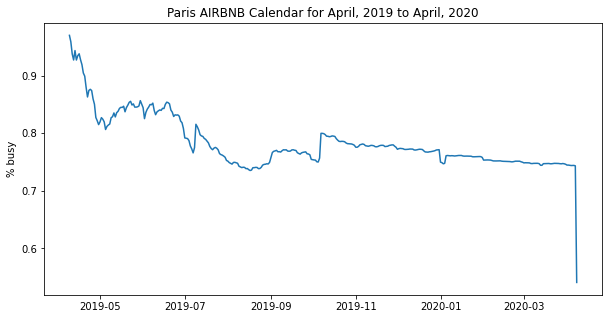

In [11]:
 #Here I review the availability of the properties and create 
#a column to account for the properties that are not available
#by assigning either a 0 or a 1

calendar_new = Calendar_2019_04[['date', 'available']]
calendar_new['busy'] = calendar_new.available.map( lambda x: 0 if x == 't' else 1)
calendar_new = calendar_new.groupby('date')['busy'].mean().reset_index()
calendar_new['date'] = pd.to_datetime(calendar_new['date'])
plt.figure(figsize=(10, 5))
plt.plot(calendar_new['date'], calendar_new['busy'])
plt.title('Paris AIRBNB Calendar for April, 2019 to April, 2020')
plt.ylabel('% busy')
plt.show();

#We see that the drop when CO-VID -19 came to Paris at the beginning of March 2020 and travel was severely restricted

In [12]:
# Data Wrangling & Exploration: As per my Primary Notebook I remove both date and pricing outliers

Calendar_2019_04.query("date >= '2019-04-09' & date <= '2020-03-01' ", inplace=True) 

#here I remove the dates after CO_VID -19 happended and affected Paris the most which was March 1, 2020

In [21]:
Calendar_2019_04.price.describe()#We notice our prices range from 8 USD to 10,000 USD per night

count    1.906491e+07
mean     1.194323e+02
std      1.645825e+02
min      8.000000e+00
25%      6.000000e+01
50%      8.500000e+01
75%      1.290000e+02
max      1.000000e+04
Name: price, dtype: float64

In [34]:
Calendar_2019_04.drop(Calendar_2019_04[Calendar_2019_04['price'] < '$10.00' ].index, inplace=True)

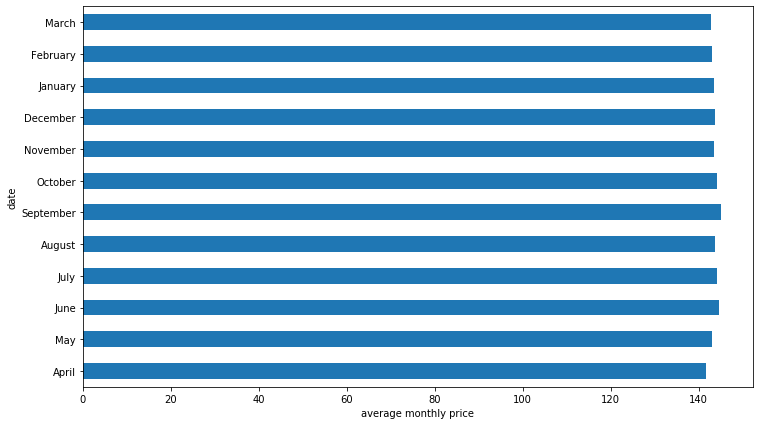

In [35]:
Calendar_2019_04['date'] = pd.to_datetime(Calendar_2019_04['date'])
Calendar_2019_04['price'] = Calendar_2019_04['price'].str.replace(',', '')
Calendar_2019_04['price'] = Calendar_2019_04['price'].str.replace('$', '')
Calendar_2019_04['price'] = Calendar_2019_04['price'].astype(float)
Calendar_2019_04['date'] = pd.to_datetime(Calendar_2019_04['date'])
mean_of_month = Calendar_2019_04.groupby(Calendar_2019_04['date'].dt.strftime('%B'),
                                 sort=False)['price'].mean()
mean_of_month.plot(kind = 'barh' , figsize = (12,7))
plt.xlabel('average monthly price');

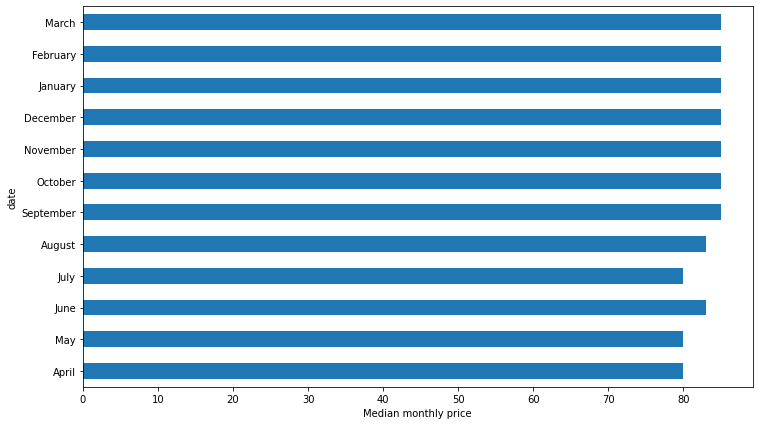

In [15]:
Calendar_2019_04['date'] = pd.to_datetime(Calendar_2019_04['date'])

median_of_month = Calendar_2019_04.groupby(Calendar_2019_04['date'].dt.strftime('%B'),
                                 sort=False)['price'].median()
median_of_month.plot(kind = 'barh' , figsize = (12,7))
plt.xlabel('Median monthly price');


In [16]:
Calendar_2019_04.price.mean() 
#We notice the average monthly price of all 58,184 listings is $143.68. 
#There is only a slight increase in September

119.43232183444053

In [17]:
Calendar_2019_04.price.median() 

85.0

In [37]:

bins = [ 0, 50, 100, 200, 300, 450, 600, 700] #Here I create groups by Prices
labels = ['0-49', '49-99', '100-199', '200-299', '300-449','450-599', '600+']
Calendar_2019_04['GroupedbyPrice'] = pd.cut(Calendar_2019_04.price, bins, labels = labels,include_lowest = True)



<function matplotlib.pyplot.show(*args, **kw)>

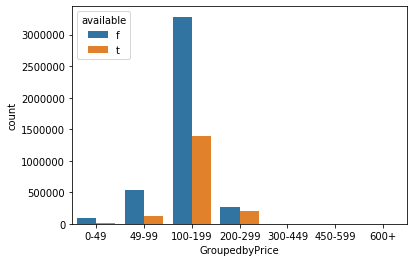

In [42]:
sns.countplot(x='GroupedbyPrice', hue = 'available', data = Calendar_2019_04) #we see most of our prices are in the 100 to 199 range
plt.show

In [49]:
bins = [ 0, 10, 20, 100, 180, 240, 300, 365] #Here I create groups for maximum days
labels = ['0-9', '10-19', '20-99', '100-179', '180-239','240-299','300+']
Calendar_2019_04['GroupedbyMaxDays'] = pd.cut(Calendar_2019_04.maximum_nights, bins, labels = labels,include_lowest = True)



<function matplotlib.pyplot.show(*args, **kw)>

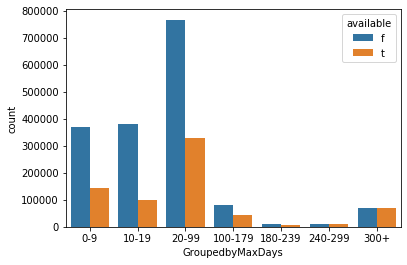

In [50]:
sns.countplot(x='GroupedbyMaxDays', hue = 'available', data = Calendar_2019_04) #we see most of our prices are in the 100 to 199 range
plt.show

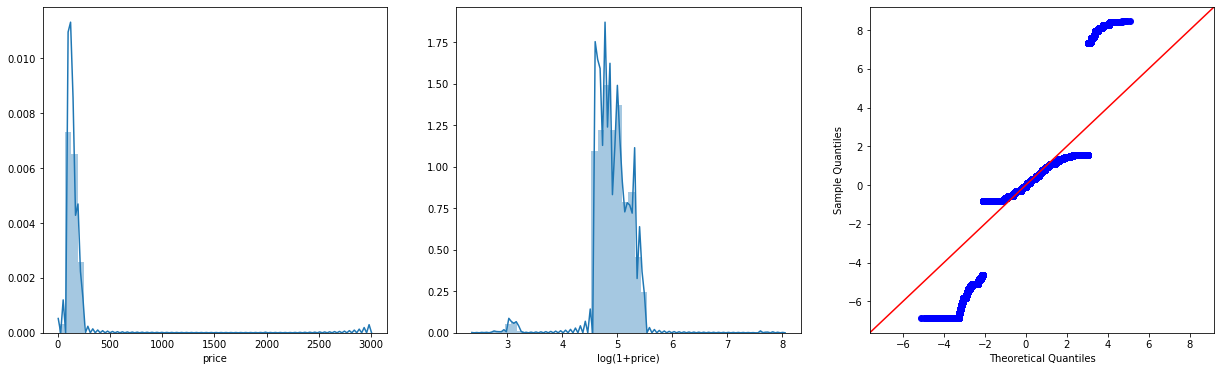

In [51]:
import statsmodels.api #Here I create a distribution plot and add logs to display a large amount of data in a compact way
import statsmodels.api as sm #We see here I have a log normal distribution
from scipy import stats
fig, axes = plt.subplots(1,3, figsize=(21,6))
sns.distplot(Calendar_2019_04['price'], ax=axes[0])
sns.distplot(np.log1p(Calendar_2019_04['price']), ax=axes[1])
axes[1].set_xlabel('log(1+price)')
sm.qqplot(np.log1p(Calendar_2019_04['price']), stats.norm, fit=True, line='45', ax=axes[2]);

In [ ]:
import plotly.express as px


fig = px.line(mean_of_month, x="price", y="date", color='neighbourhood')
fig.show()

C:\Users\1800r\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


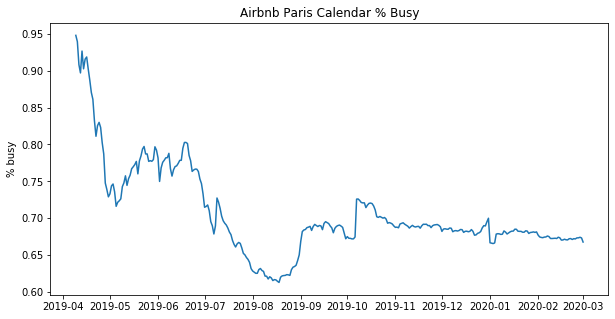

In [55]:
calendar_new = Calendar_2019_04[['date', 'available','price']]
calendar_new['busy'] = calendar_new.available.map( lambda x: 0 if x == 't' else 1)
calendar_new = calendar_new.groupby('date')['busy'].mean().reset_index()
calendar_new['date'] = pd.to_datetime(calendar_new['date'])
plt.figure(figsize=(10, 5))
plt.plot(calendar_new['date'], calendar_new['busy'])
plt.title('Airbnb Paris Calendar % Busy')
plt.ylabel('% busy')
plt.show();

In [56]:
calendar_new.mean() #We notice an average of 70% of listings are busy during our 11 month time frame

busy    0.706325
dtype: float64

C:\Users\1800r\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


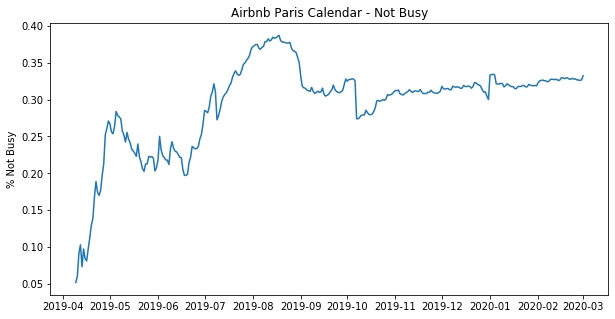

In [57]:
calendar_new = Calendar_2019_04[['date', 'available', 'price']] #In this plot we 
calendar_new['not_busy'] = calendar_new.available.map( lambda x: 0 if x == 'f' else 1)
calendar_new = calendar_new.groupby('date')['not_busy'].mean().reset_index()
calendar_new['date'] = pd.to_datetime(calendar_new['date'])
plt.figure(figsize=(10, 5))
plt.plot(calendar_new['date'], calendar_new['not_busy'])
plt.title('Airbnb Paris Calendar - Not Busy')
plt.ylabel('% Not Busy')
plt.show();

In [28]:
from datetime import date
import calendar


In [29]:
Calendar_2019_04['date'] = pd.to_datetime(Calendar_2019_04['date'], errors='coerce')

In [30]:
Calendar_2019_04['day_of_week'] = Calendar_2019_04['date'].dt.day_name()

In [31]:
calendar_new['price'] = Calendar_2019_04['price'] 

In [32]:
import matplotlib.pyplot as plt

Prices_By_Day=  Calendar_2019_04.groupby(['day_of_week'])['price'].mean() 
print(Prices_By_Day)


day_of_week
Friday       120.396544
Monday       119.066688
Saturday     120.564720
Sunday       118.748706
Thursday     119.135847
Tuesday      118.981046
Wednesday    119.121824
Name: price, dtype: float64


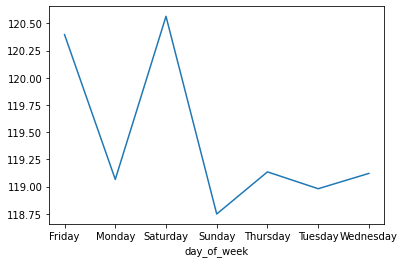

In [33]:
Prices_By_Day.plot() #We only notice a miniscule difference in cost average per day

In [34]:
Calendar_2019_04.head(5)

,listing_id,date,available,price,adjusted_price,minimum_nights,maximum_nights,GroupedbyPrice,day_of_week
0,76348,2019-04-10,f,27.0,$27.00,7.0,365.0,0-49,Wednesday
1,76348,2019-04-11,f,27.0,$27.00,7.0,365.0,0-49,Thursday
2,76348,2019-04-12,f,31.0,$31.00,7.0,365.0,0-49,Friday
3,76348,2019-04-13,f,31.0,$31.00,7.0,365.0,0-49,Saturday
4,76348,2019-04-14,f,27.0,$27.00,7.0,365.0,0-49,Sunday


In [35]:
Calendar_2019_04['available'].value_counts(dropna=False) #These are the days that are available and not available in the calendar year

f    15029323
t     4035585
Name: available, dtype: int64

In [36]:
Paris_availability = Calendar_2019_04.groupby(['listing_id']).available.count()
Paris_availability.head(5)

listing_id
2394    328
2577    328
3109    327
5396    327
7397    327
Name: available, dtype: int64

In [37]:
Over_365 = Paris_availability[Paris_availability != 365]

#I notice there are listings with more than 365 days which I need to change so I adjust them to 365

In [38]:
Calendar_2019_04['unavailable'] = np.where(Calendar_2019_04['available']=="f", 1, 0) #Here I create a counting method for my unavailable properties
Calendar_2019_04.head()

,listing_id,date,available,price,adjusted_price,minimum_nights,maximum_nights,GroupedbyPrice,day_of_week,unavailable
0,76348,2019-04-10,f,27.0,$27.00,7.0,365.0,0-49,Wednesday,1
1,76348,2019-04-11,f,27.0,$27.00,7.0,365.0,0-49,Thursday,1
2,76348,2019-04-12,f,31.0,$31.00,7.0,365.0,0-49,Friday,1
3,76348,2019-04-13,f,31.0,$31.00,7.0,365.0,0-49,Saturday,1
4,76348,2019-04-14,f,27.0,$27.00,7.0,365.0,0-49,Sunday,1


In [42]:
Paris_unavail = Calendar_2019_04.groupby(['listing_id']).agg({'unavailable':'sum','available':'count'})
Paris_unavail.rename(index=str, columns={"unavailable": "total_days_unavailable",\
                                       "available": "total_days_available"},inplace=True)
Paris_unavail['unavail_percentage'] = Paris_unavail['total_days_unavailable']/Paris_unavail['total_days_available']
Paris_unavail.head()

,total_days_unavailable,total_days_available,unavail_percentage
listing_id,,,
2394,50,328,0.152439
2577,217,328,0.661585
3109,88,327,0.269113
5396,268,327,0.819572
7397,149,327,0.455657


In [43]:
Avail = Paris_unavail.total_days_available
Un_Avail = Paris_unavail.total_days_unavailable

In [44]:
Paris_unavail['price'] = Calendar_2019_04['price']

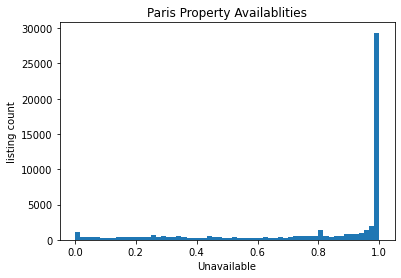

In [45]:
Paris_unavail.unavail_percentage.plot(kind='hist',bins=60);
plt.title('Paris Property Availablities')
plt.xlabel('Unavailable')
plt.ylabel('listing count')
plt.show()
#We see that most of the properties are unavailable most of the time

In [73]:
#67% of properties are unavailable 365 days of the year

Calendar_2019_04.query("date >= '2019-04-09' & date <= '2020-03-01' ", inplace=True)



In [74]:
Paris_unavail.unavail_percentage.mean() 

0.676628516138283